# Importation des librairies

In [3]:
!pip install kmodes

  Using cached kmodes-0.12.2-py2.py3-none-any.whl.metadata (8.1 kB)
Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [32]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



# Téléchargement des données

In [7]:
df = pd.read_csv("/Users/salahabbad/Downloads/Life Style Data/data/Final_data.csv")
df = df.drop(columns ="Burns Calories (per 30 min)_bc")
df.shape
print(df.head())
print(df.columns)


     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...   BMI_calc  \
0                      1.00          1080.90     Strength  ...  24.870447   
1                      1.37          1809.91         HIIT  ...  23.479709   
2                      0.91           802.26       Cardio  ...  21.148123   
3                      1.10          1450.79         HIIT  ...  32.449827   
4                      1.08          1166.40     Strength  ...  14.831372   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0         

# Statistiques descriptives et graphiques

In [8]:
df.isnull().values.any()

False

In [9]:
moyenne_age = df['Age'].mean()
nbhomme_femme = df['Gender'].value_counts()
pct_homme = df[df['Gender'] == 'Female']
pct_homme = (pct_homme.shape[0] / df.shape[0]) * 100
pct_femme = 1 - pct_homme
type_entrainement = df['Workout_Type'].value_counts()
pct_gras_moyen = df['Fat_Percentage'].mean()
df_homme = df[df['Gender'] == 'Male']
pct_gras_moyen_homme = df_homme['Fat_Percentage'].mean()
print(type_entrainement)
print(pct_gras_moyen)
df_stat = df.describe().round(2)


Workout_Type
Strength    5071
Yoga        5032
HIIT        4974
Cardio      4923
Name: count, dtype: int64
26.101313358952215


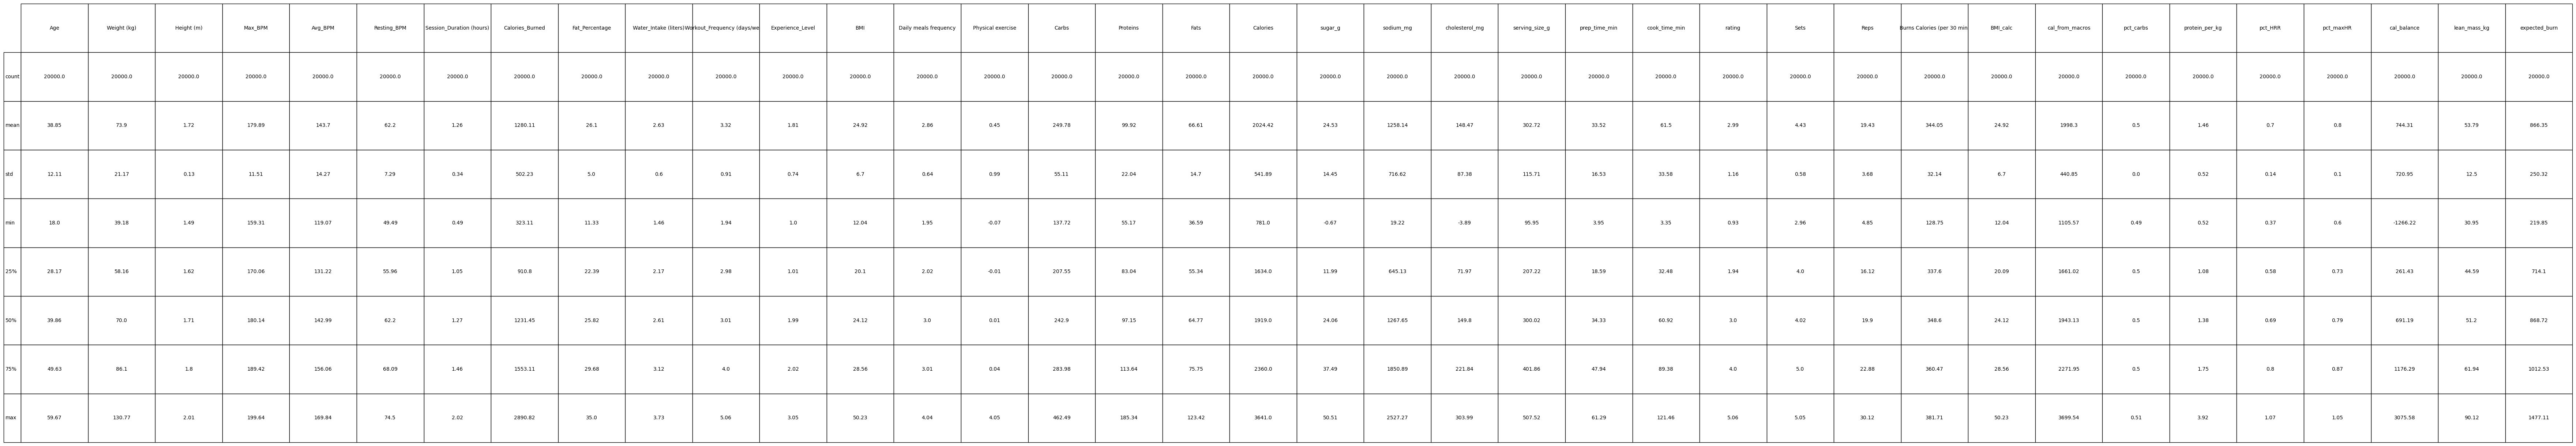

In [10]:
# Création du visuel
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Pas d’axes

# Affichage du tableau
table = ax.table(
    cellText=df_stat.values,
    rowLabels=df_stat.index,
    colLabels=df_stat.columns,
    cellLoc='center',
    loc='center'
)

# Mise en forme
table.scale(15, 8)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

/var/folders/gj/z9fc5_5j6v35c3w_lzkxp_n00000gn/T/ipykernel_6743/911619170.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


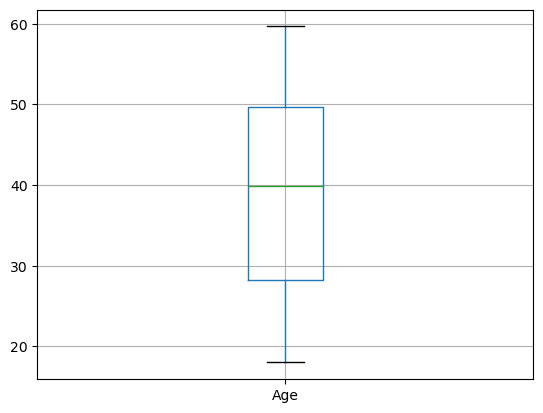

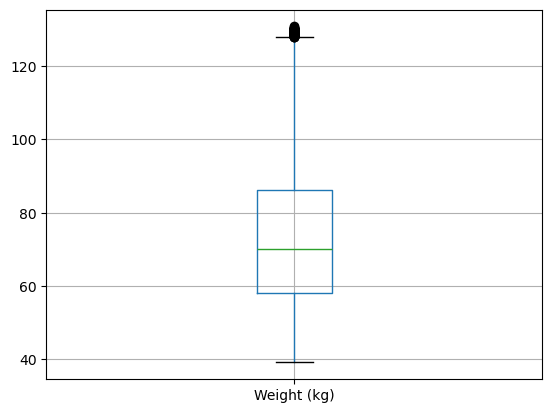

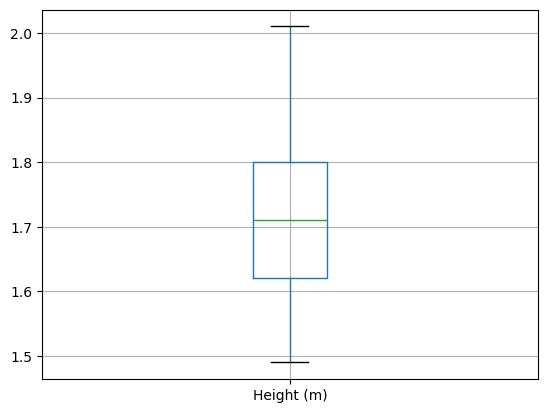

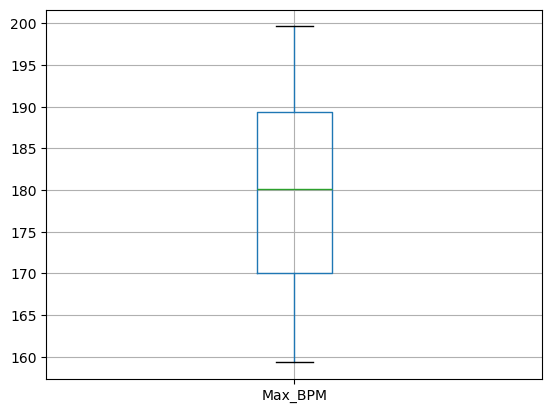

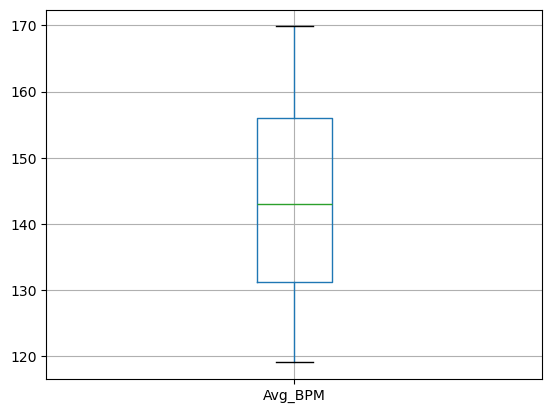

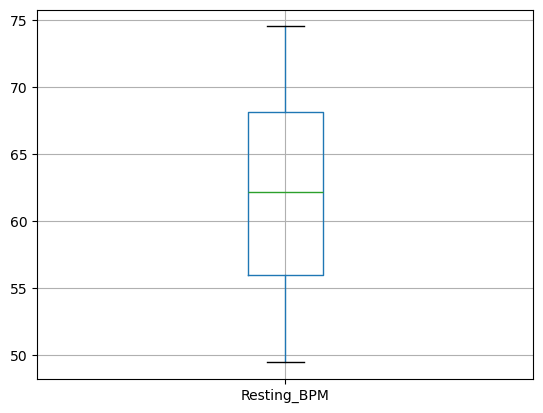

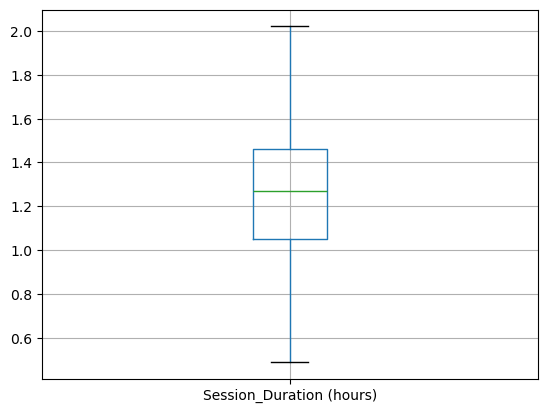

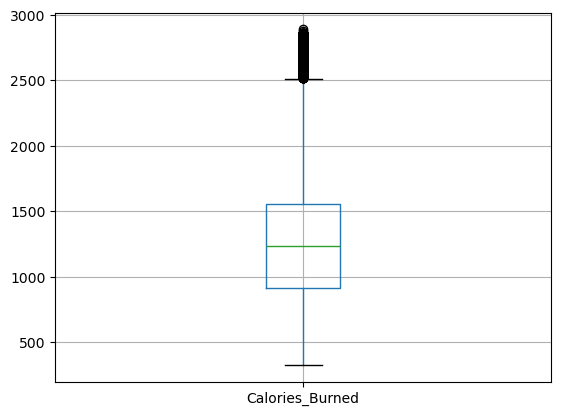

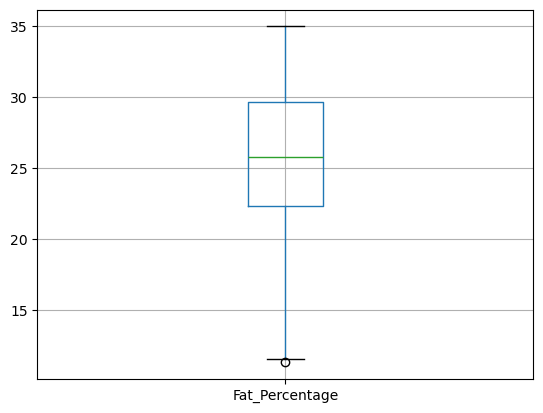

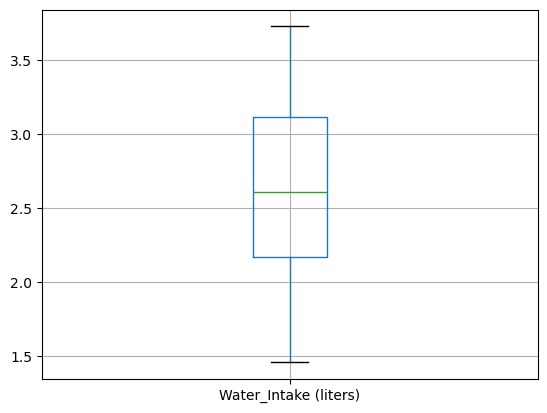

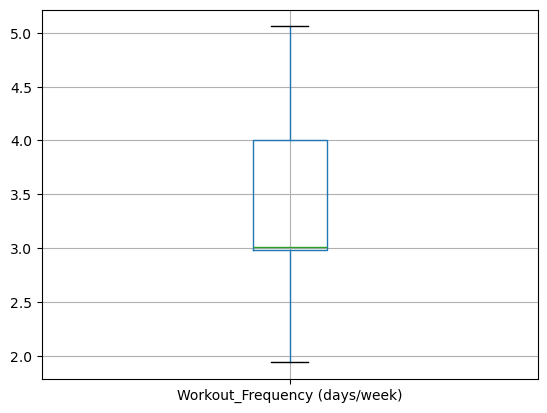

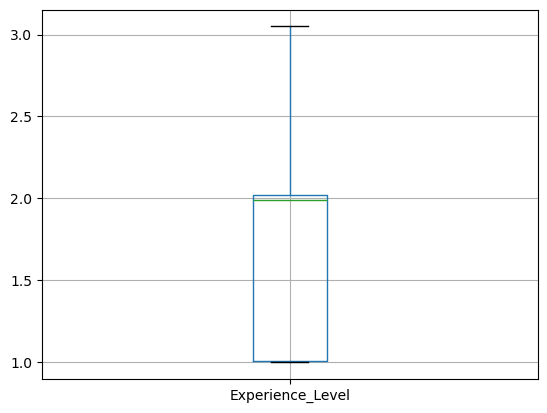

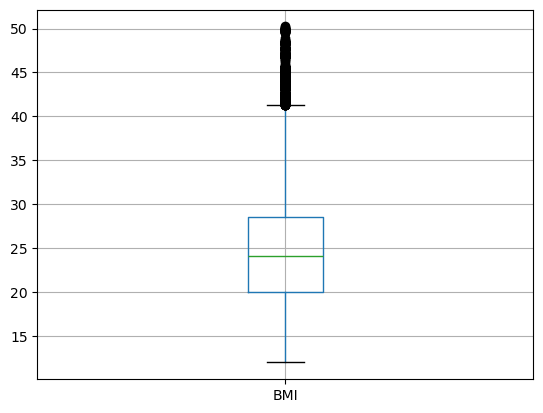

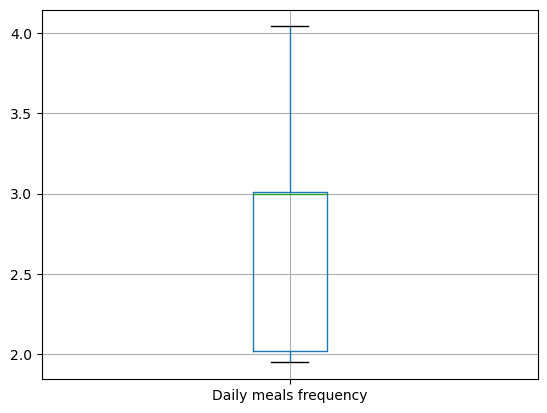

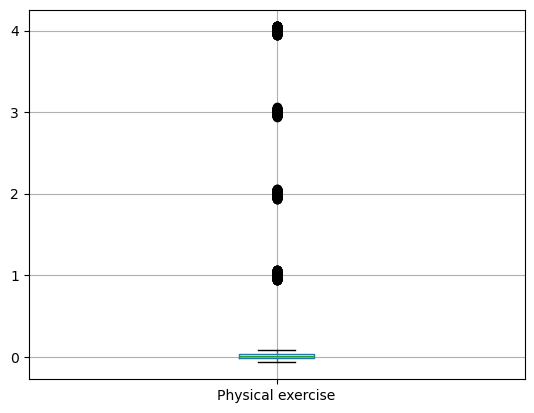

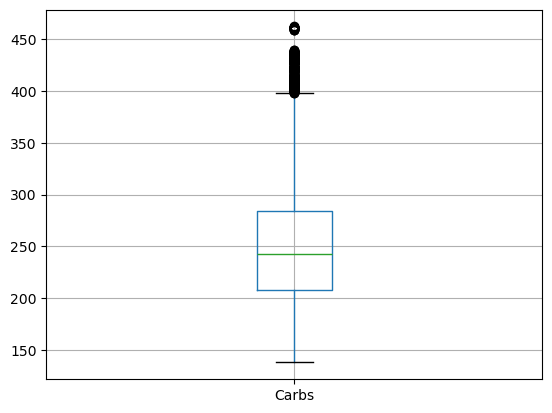

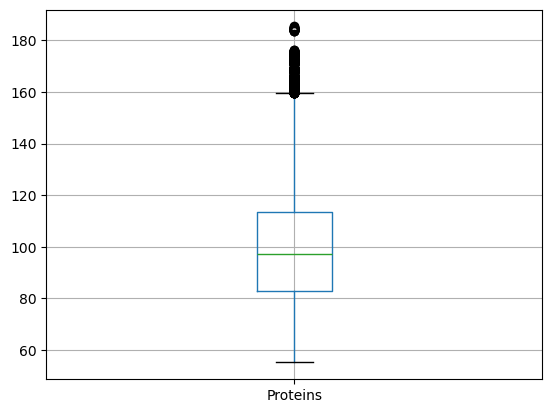

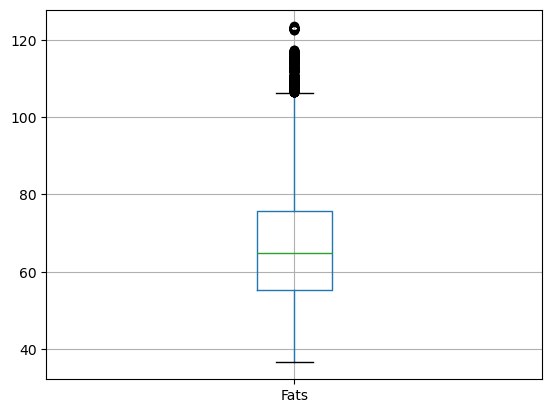

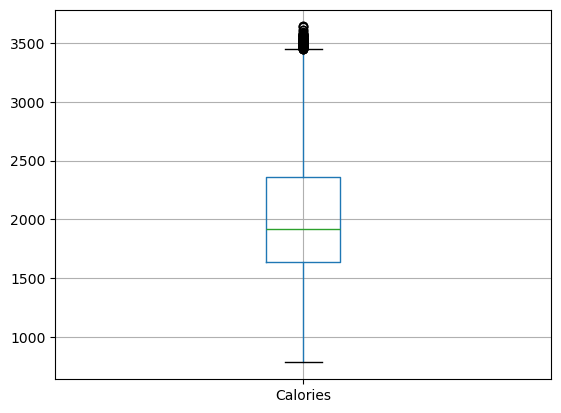

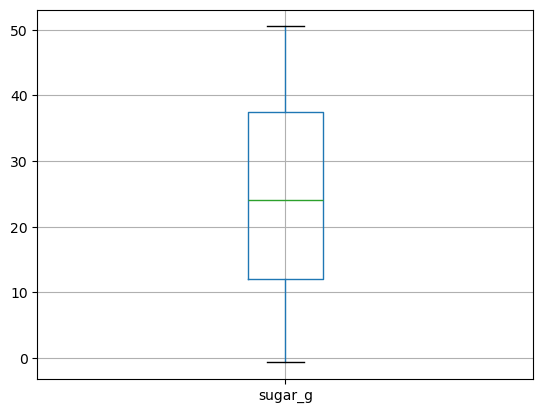

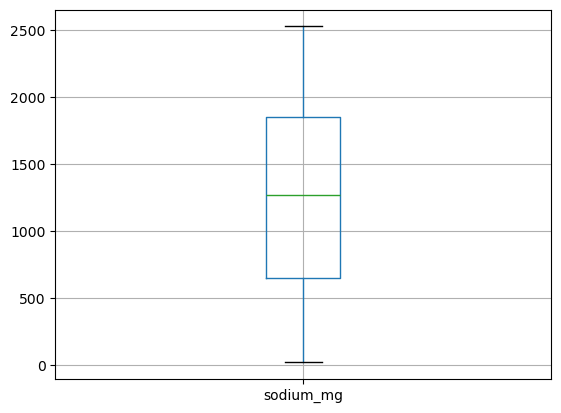

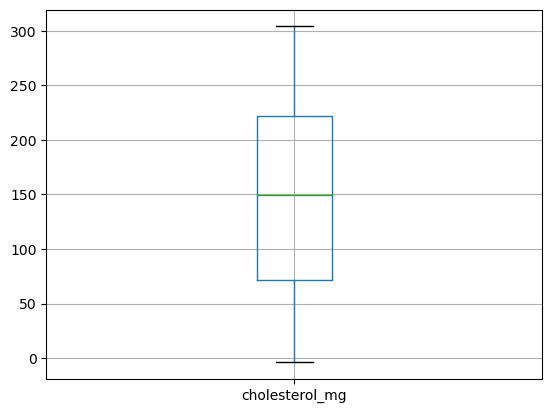

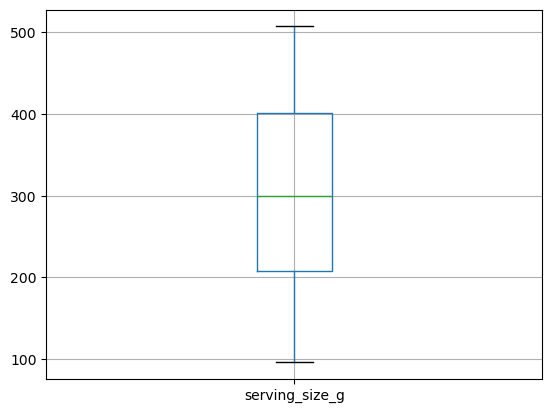

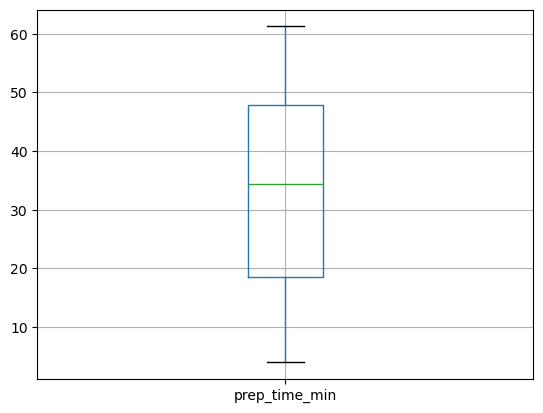

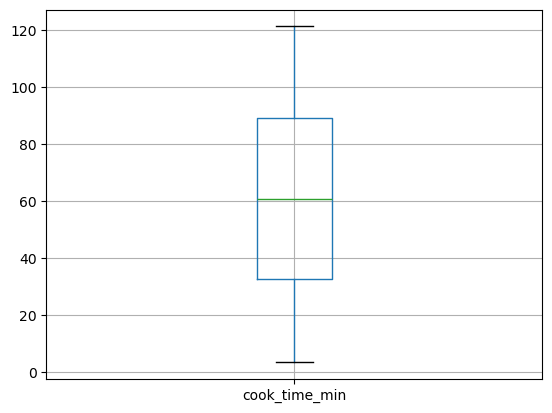

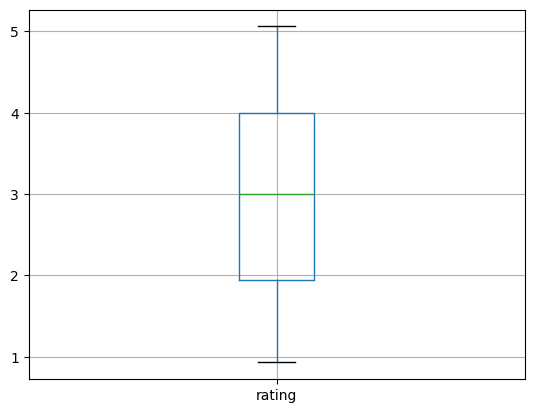

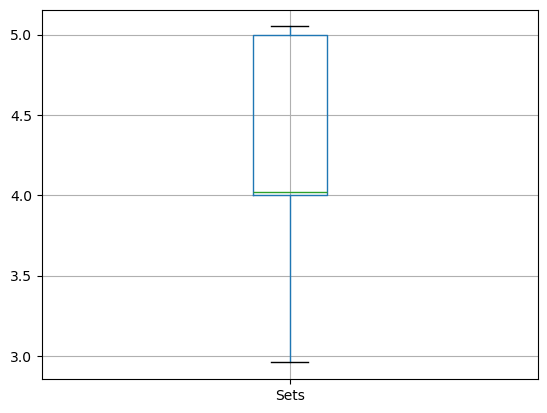

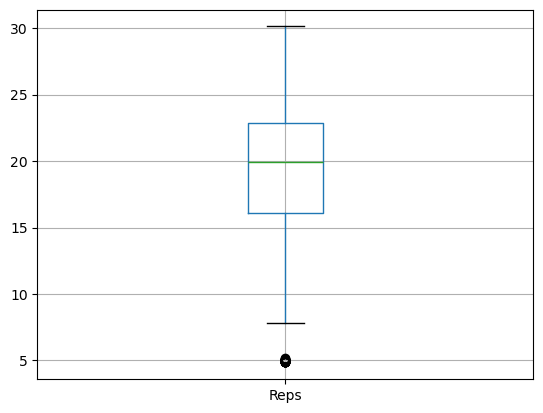

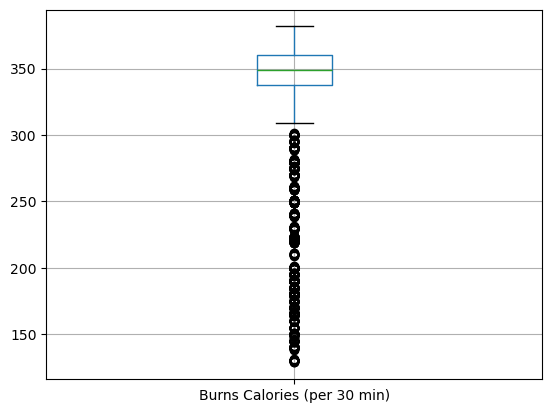

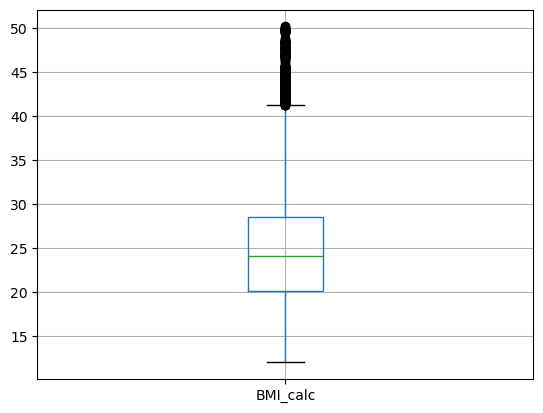

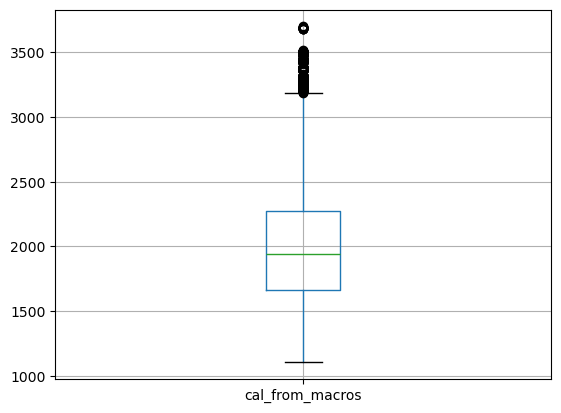

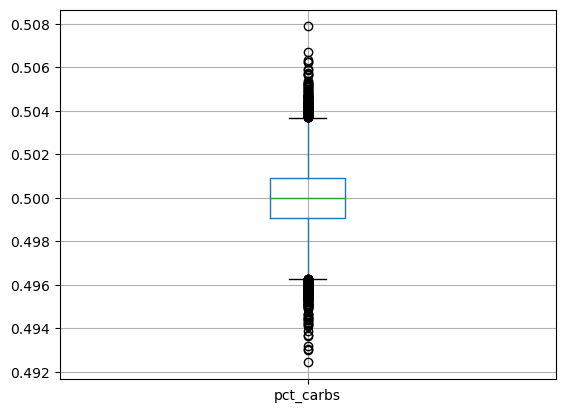

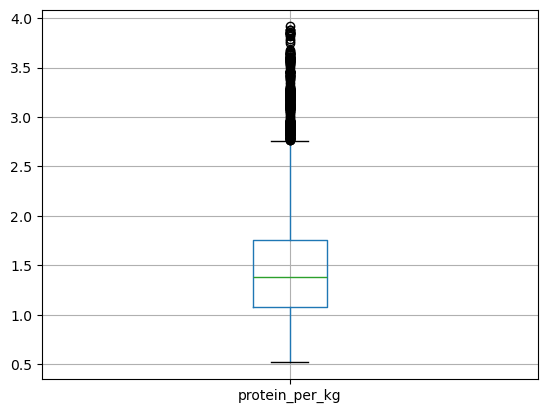

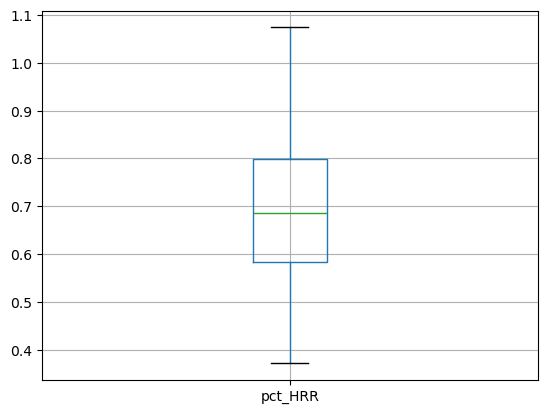

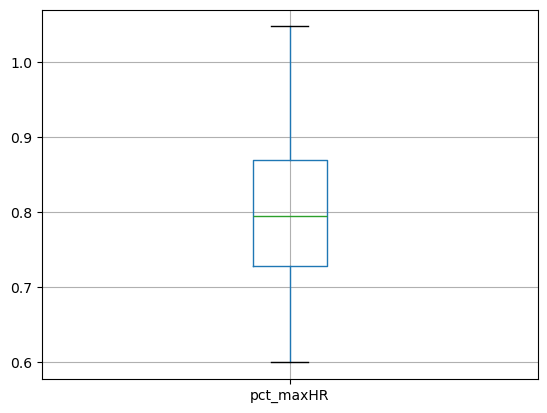

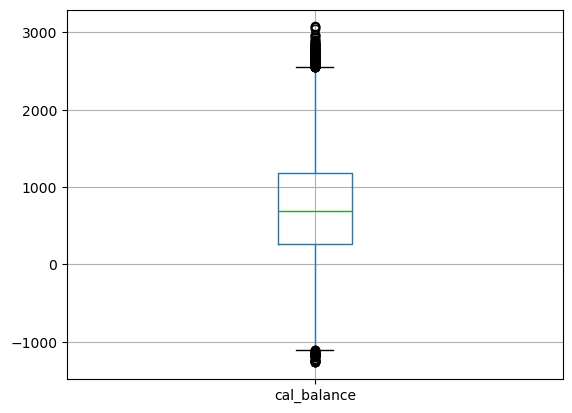

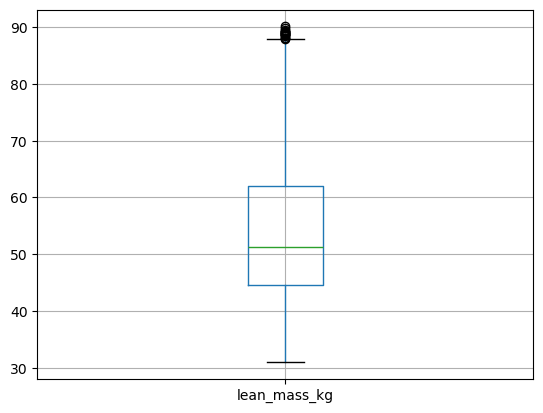

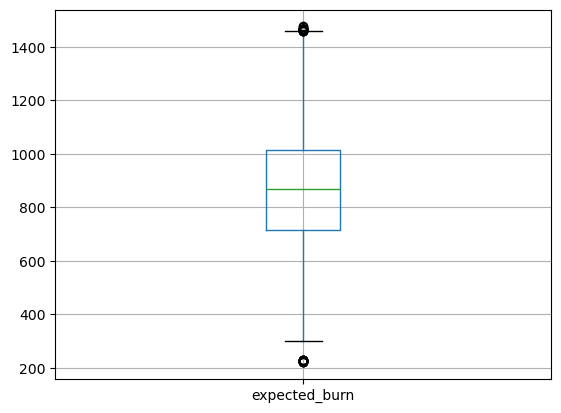

In [11]:
df1=df.select_dtypes(exclude=['object'])


for column in df1:
    plt.figure()
    df.boxplot([column])

plt.show()

# Régression Linéaire pour prédire le poids en fonctions de différents facteurs

[108.69271552  93.66503834  87.82460816 ...  46.0741424   71.37651461
 102.04054251]
0.8443721507019618


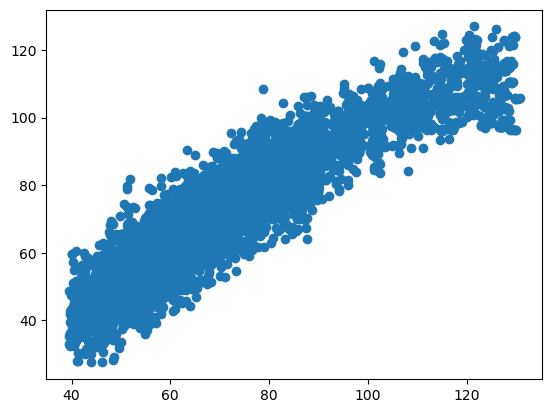

In [12]:
reg_Y = df['Weight (kg)']
reg_X = df[['Fat_Percentage', 'Session_Duration (hours)', 'Calories_Burned', 'Age', 'Proteins', 'Height (m)']]
regression = LinearRegression().fit(reg_X, reg_Y)
X_train, X_test, y_train, y_test = train_test_split(reg_X, reg_Y, test_size=0.3, random_state=42)
y_pred = regression.predict(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(y_pred)
print(r2)
plt.scatter(y_test, y_pred)

# Clustering 
Afin de voir si on peut distinguer des groupes d'individus aux caractéristiques similaires

In [13]:
variable_quali = df.select_dtypes(include=['object','category']).columns
indice_quali = [df.columns.get_loc(col) for col in variable_quali]
data = df.to_numpy()
kproto = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=2)
clusters = kproto.fit_predict(data, categorical = indice_quali)
print(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5153, ncost: 18611788624.433533
Run: 1, iteration: 2/100, moves: 1493, ncost: 18454607940.048855
Run: 1, iteration: 3/100, moves: 553, ncost: 18424560047.48332
Run: 1, iteration: 4/100, moves: 412, ncost: 18405786523.778023
Run: 1, iteration: 5/100, moves: 310, ncost: 18395216431.410507
Run: 1, iteration: 6/100, moves: 159, ncost: 18391812792.57426
Run: 1, iteration: 7/100, moves: 124, ncost: 18389532241.484592
Run: 1, iteration: 8/100, moves: 82, ncost: 18388484622.49812
Run: 1, iteration: 9/100, moves: 63, ncost: 18387858262.793423
Run: 1, iteration: 10/100, moves: 33, ncost: 18387674966.82052
Run: 1, iteration: 11/100, moves: 36, ncost: 18387525450.106934
Run: 1, iteration: 12/100, moves: 11, ncost: 18387493183.08077
Run: 1, iteration: 13/100, moves: 8, ncost: 18387480771.041664
Run: 1, iteration:


Centroïdes des clusters :
[['39.21142255005254' '66.78952581664937' '1.7078977871443588'
  '179.83590094836623' '143.48113277133797' '62.44557692307679'
  '1.641056375131713' '2015.9231348788255' '24.509965224990648'
  '2.8119625922023235' '4.058498419388825' '2.556114330874601'
  '22.984122760800712' '2.8604952581664853' '0.5121022128556372'
  '247.75223129610055' '99.0969704952581' '66.06846417281376'
  '1873.063224446786' '24.235252897787113' '1226.1176080084356'
  '149.90223656480543' '304.7167781875677' '34.45196259220219'
  '59.031580611169474' '3.033061116965235' '4.47629873551105'
  '19.854618018967393' '345.89609852476406' '22.984074883749496'
  '1982.0129847207627' '0.5000034223322665' '1.550245788631347'
  '0.6982830528044767' '0.8015686454617268' '-142.85991043203404'
  '50.075928101990996' '1136.857190410955' 'Male' 'HIIT' 'Other' 'Lunch'
  'Keto' 'Steamed' 'Bulgarian Split Squats'
  'Builds explosive upper body power' 'Legs, Shoulders, Core' 'Wall'
  'Advanced' 'Legs' 'U

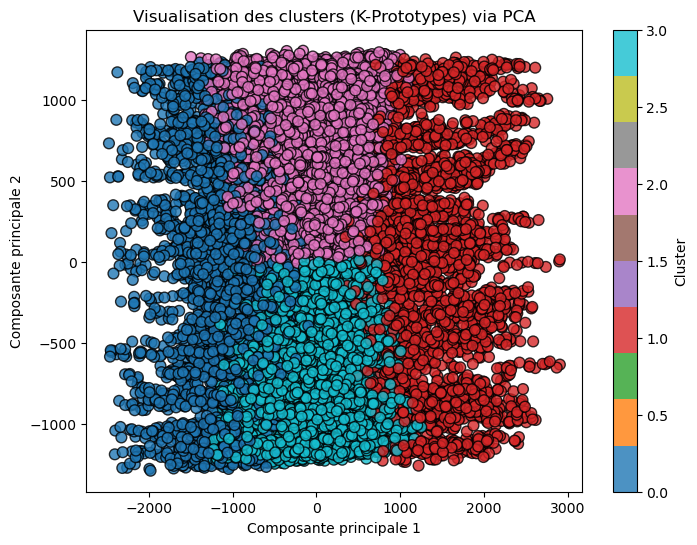

In [14]:
df['cluster'] = clusters  # ajout de la colonne cluster

print("\nCentroïdes des clusters :")
print(kproto.cluster_centroids_)

# --- Étape 3 : encodage des variables catégorielles pour la PCA ---
df_encoded = pd.get_dummies(df.drop('cluster', axis=1))

# --- Étape 4 : réduction de dimension (PCA) ---
pca = PCA(n_components=2)
components = pca.fit_transform(df_encoded)

# --- Étape 5 : visualisation graphique ---
plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=df['cluster'], cmap='tab10', s=60, alpha=0.8, edgecolor='k')
plt.title('Visualisation des clusters (K-Prototypes) via PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
df_num = df.select_dtypes(include=['int64', 'float64', 'float32'])
X_scaled = StandardScaler().fit_transform(df_num)

pca = PCA(n_components=2)
pca.fit(X_scaled)

loadings = pd.DataFrame(
    pca.components_,
    columns=df_num.columns,
    index=['PC1', 'PC2']
)
contrib = (loadings**2).div((loadings**2).sum(axis=1), axis=0) * 100
pc1 = contrib.iloc[0]
pc2 = contrib.iloc[1]
print(pc1.abs().sort_values(ascending=False).head(7))
print(pc2.abs().sort_values(ascending=False).head(7))

Weight (kg)       13.644913
Calories          13.023509
lean_mass_kg      12.529955
BMI               11.820087
BMI_calc          11.820027
protein_per_kg    10.947403
Fat_Percentage    10.337445
Name: PC1, dtype: float64
cal_from_macros      18.769334
Proteins             18.765434
Carbs                18.764858
Fats                 18.763980
Physical exercise    10.253964
protein_per_kg        3.536905
Calories              1.519054
Name: PC2, dtype: float64


#### En analysant les valeurs propres on voit que la composante principale 1 est davantage composé de variable en lien avec le corps des individus (weight, lean mass, bmi...) et la composante principale 2 se concentre surtout sur l'aspect effort physique et alimentation. 

# Que peut-on en dire ?


In [16]:
cluster_resume = df.groupby('cluster').mean(numeric_only=True)
difference = (cluster_resume.max() - cluster_resume.min())/cluster_resume.mean()
variables_significatives = difference[difference > 0.10].index
print(cluster_resume[variables_significatives])
print(cluster_resume["Height (m)"])


         Weight (kg)  Session_Duration (hours)  Calories_Burned  \
cluster                                                           
0          66.789526                  1.641056      2015.923135   
1         108.086245                  1.098404      1027.000338   
2          65.638878                  1.187123      1129.627303   
3          67.108252                  1.193768      1131.646513   

         Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
cluster                                                                         
0             24.509965               2.811963                       4.058498   
1             32.201165               2.916377                       2.942656   
2             24.670878               2.475255                       3.129471   
3             25.043849               2.506053                       3.280508   

         Experience_Level        BMI  Physical exercise     Calories  \
cluster                               

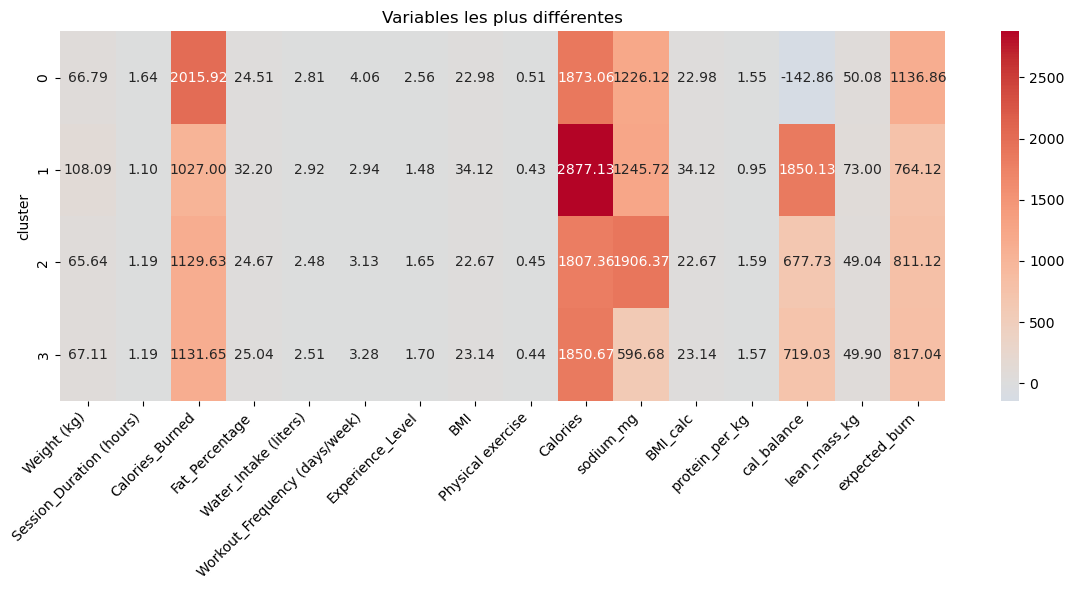

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(cluster_resume[variables_significatives], annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Variables les plus différentes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


On peut désormais avoir une interprétation des groupes, le groupe 0 représentée par les points bleu concernent les personnes qui ont des caractéristiques physiques "basses" mais qui ont des apports alimentaires assez variée au niveau des macronutriments, le groupe 1 lui représente les personnes avec des caractéristiques physiques plus élevée (poids, IMC plus elevée ainsi qu'un apport caloriques nettement supérieure) avec un apport en macronutriment assez élevée (on remarque que leur taux de masse maigre (67%) est le plus faible ici, cela pourrait donc signifier qu'il y'a une consommation de lipides et de glucides trop importante, et une consommation de protéine trop faible). Les groupes 3 et 4 représentes des individus avec caractéristiques physiques équilibrées et avec soit des apports en macronutriments élevée (groupe 2) ou des apports en macronutriments faibles (groupe 3)

# Forêt Aléatoire

In [40]:
Y = df[["Height (m)", "Weight (kg)", "lean_mass_kg"]]
X = df[["Calories_Burned", "Fat_Percentage", "Workout_Frequency (days/week)", "Calories", "protein_per_kg","cal_balance", "expected_burn", "Daily meals frequency"]]
x_train, x_test, y_train, y_test  = train_test_split(X, Y, test_size=0.2, random_state=42)
modele_rf = RandomForestRegressor(
     n_estimators=100,
     criterion='squared_error',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='sqrt',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     ccp_alpha=0.0,
     max_samples=None,)
modele_rf.fit(x_train, y_train)

pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
Calories,0.488952
cal_balance,0.172417
protein_per_kg,0.168994
Fat_Percentage,0.113463
expected_burn,0.023900
Calories_Burned,0.018016
Workout_Frequency (days/week),0.009101
Daily meals frequency,0.005157


In [41]:
y_pred = modele_rf.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 1.1847461568242759
MSE: 4.045397273585771
RMSE: 2.0113172980874428
R²: 0.9033641202704743


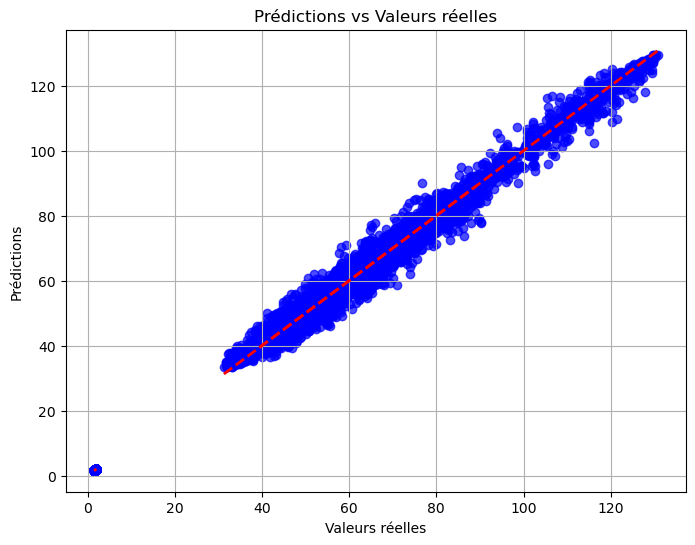

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs réelles")
plt.grid(True)
plt.show()

L'utilisation d'un modele de foret aléatoire nous permet de vérifier à quel point l'alimentation et l'activité physique permet de prédire le poids, la taille et le taux de masse maigre d'un individu, on voit notamment à l'aide du graphique et des métriques de vérification que cela nous permet d'avoir une prévision intéressante avec une marge d'erreur en moyenne acceptable, le modele pourrait être amélioré en essayant d'apporter plus de précisions aux niveaux des hyperparamètres du modèle. C'est ce que j'essaierai de faire dans de prochains travaux.